In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pathlib

from ALLCools.plot import *
from wmb import *

CEMBA_SNM3C_3C_CHROM100K_RAW_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/CEMBA_3C/mcds/CEMBA.snm3C.chrom100k_raw.zarr
CEMBA_SNM3C_3C_COMPARTMENT_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/CEMBA_3C/mcds/CEMBA.snm3C.3C.mcds/chrom100k
CEMBA_SNM3C_3C_DOMAIN_INSULATION_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/CEMBA_3C/mcds/CEMBA.snm3C.3C.mcds/chrom25k
CEMBA_SNM3C_CELL_TYPE_ANNOTATION_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/cemba/CEMBA.snm3C.Annotations.zarr
CEMBA_SNM3C_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/CEMBA.snm3C
CEMBA_SNMC_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/CEMBA.snmC
AIBS_SMART_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/AIBS.SMART
AIBS_TENX_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/AIBS.TENX
BROAD_TENX_GENE_CHUNK_ZARR_PATH do not exist: /gale/netapp/cemba3c/BICCN/wmb/GeneChunks/BROAD.TENX


In [2]:
mc_annot = cemba.get_mc_annot()
atac_annot = cemba_atac.get_atac_annot()

In [3]:
mc_l4_to_inte_group = pd.read_csv('mc_l4_to_integration_group.csv', index_col=0).squeeze()
mc_l4_to_inte_l1 = mc_l4_to_inte_group.apply(lambda i: '_'.join(i.split('_')[:1]))
mc_l4_to_inte_l2 = mc_l4_to_inte_group.apply(lambda i: '_'.join(i.split('_')[:2]))
mc_l4_to_inte_l4 = mc_l4_to_inte_group.apply(lambda i: '_'.join(i.split('_')[:3]))

atac_l4_to_inte_group = pd.read_csv('atac_l4_to_integration_group.csv', index_col=0).squeeze()
atac_l4_to_inte_l1 = atac_l4_to_inte_group.apply(lambda i: '_'.join(str(i).split('_')[:1]))
atac_l4_to_inte_l2 = atac_l4_to_inte_group.apply(lambda i: '_'.join(str(i).split('_')[:2]))
atac_l4_to_inte_l4 = atac_l4_to_inte_group.apply(lambda i: '_'.join(str(i).split('_')[:3]))

## Read Confusion Matrix

- Load L1 to L4 confusion matrix
- Turn all the confusion matrix into mC and atac L4 resolution

### L1 Confusion Matrix

In [4]:
l1_confusion_matrix = pd.read_hdf(f'L1_confusion_matrx.L4_clusters.hdf')

## L2 Confuion Matrix

In [5]:
l2_confusion_matrix = pd.read_hdf('L2_confusion_matrx.L4_clusters.hdf')

## L4 Confusion Matrix
- read all L4 overlap score matrix
- replace value of l2_confusion_matrix with L4 values

In [6]:
l4_confusion_matrix = pd.read_hdf('L4_confusion_matrx.L4_clusters.hdf')

## Plot Confusion matrix 

- Three confusion matrix showing the process from L1 to L4 integration

In [7]:
palette = 'magma_r'

cmap = plt.get_cmap(palette).copy()
norm = mpl.colors.Normalize(vmin=0, vmax=1)

scalar_mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

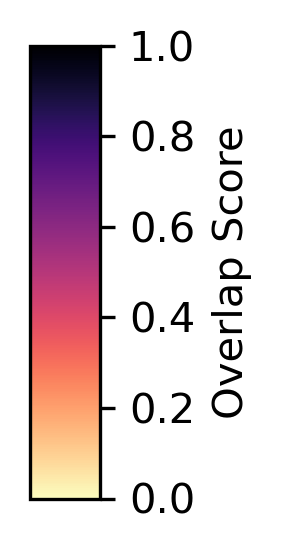

In [8]:
fig, ax = plt.subplots(figsize=(0.3, 2), dpi=300)
fig.colorbar(scalar_mappable,
             cax=ax, label='Overlap Score')

### L1

In [9]:
mat = l1_confusion_matrix.loc[atac_l4_to_inte_l1.sort_values().index, mc_l4_to_inte_l1.sort_values().index]

In [10]:
# tidy data
plot_data = mat.unstack().reset_index()
plot_data.columns = ['mC', 'atac', 'OS']
plot_data = plot_data[plot_data['OS'] > 0].copy()

y_map = {c: i for i, c in enumerate(mat.index)}
plot_data['y'] = plot_data['atac'].map(y_map)

x_map = {c: i for i, c in enumerate(mat.columns)}
plot_data['x'] = plot_data['mC'].map(x_map)

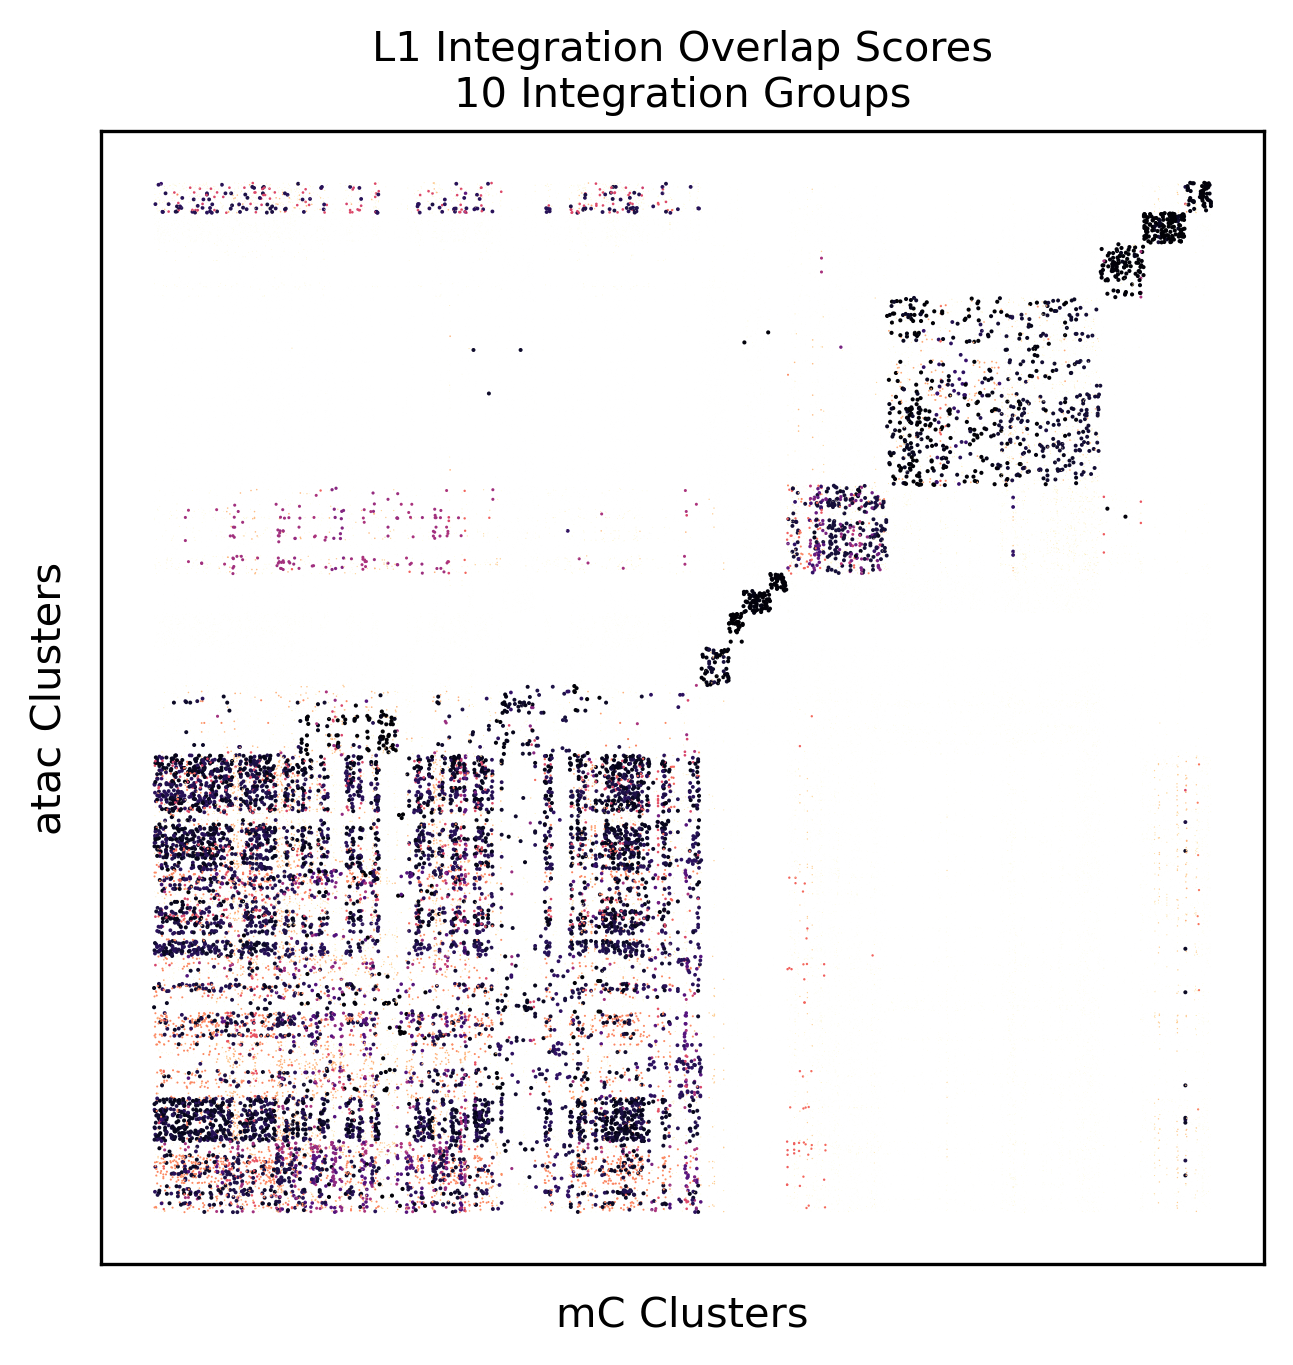

In [11]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.scatterplot(data=plot_data.sample(100000),
                x='x',
                y='y',
                linewidth=0,
                size='OS',
                size_norm=(0, 1),
                sizes=(0, 1),
                hue='OS',
                hue_norm=(0, 1),
                palette=palette,
                cmap=cmap,
                legend=None)
ax.set(xticks=[],
       xlabel='mC Clusters',
       yticks=[],
       ylabel='atac Clusters')

ax.set_title(f'L1 Integration Overlap Scores\n'
             f'{atac_l4_to_inte_l1.unique().size} Integration Groups',
             fontsize=10)
pass

fig.savefig('L1_confusion_matrix.png')

### L2

In [12]:
mat = l2_confusion_matrix.loc[atac_l4_to_inte_l2.sort_values().index, mc_l4_to_inte_l2.sort_values().index]

In [13]:
# tidy data
plot_data = mat.unstack().reset_index()
plot_data.columns = ['mC', 'atac', 'OS']
plot_data = plot_data[plot_data['OS'] > 0].copy()

y_map = {c: i for i, c in enumerate(mat.index)}
plot_data['y'] = plot_data['atac'].map(y_map)

x_map = {c: i for i, c in enumerate(mat.columns)}
plot_data['x'] = plot_data['mC'].map(x_map)

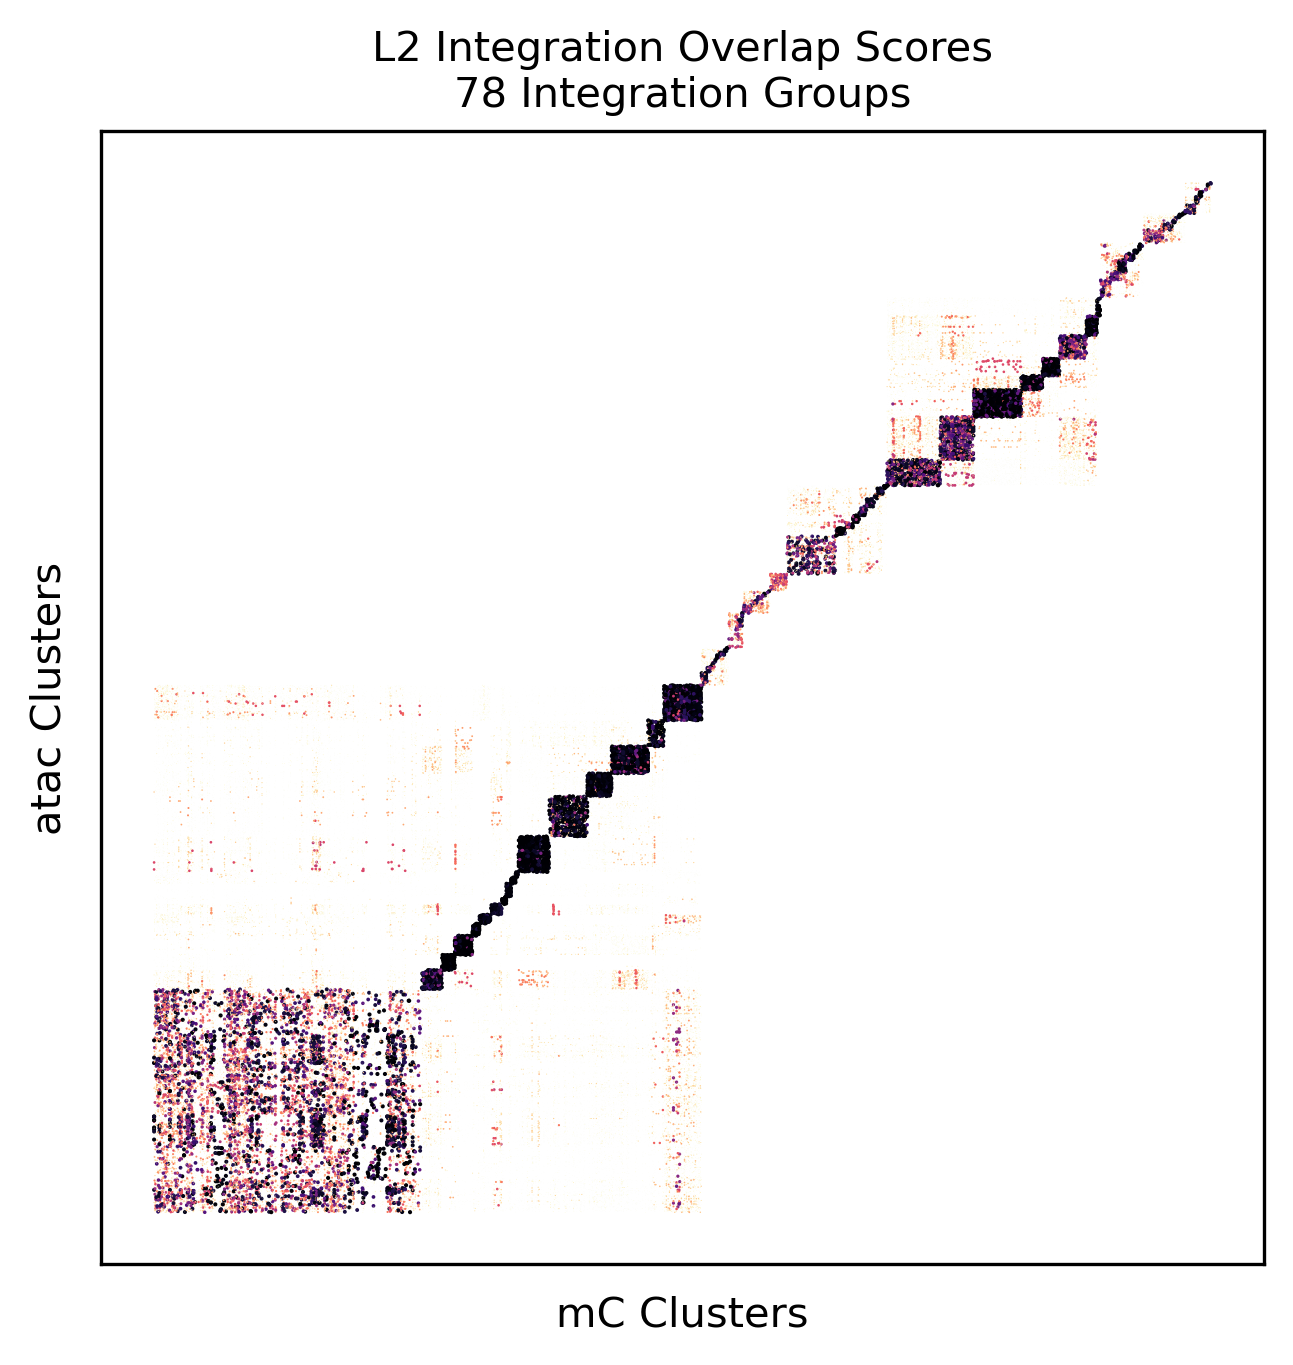

In [15]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.scatterplot(data=plot_data.sample(100000),
                x='x',
                y='y',
                linewidth=0,
                size='OS',
                size_norm=(0, 1),
                sizes=(0, 1),
                hue='OS',
                hue_norm=(0, 1),
                palette=palette,
                cmap=cmap,
                legend=None)
ax.set(xticks=[],
       xlabel='mC Clusters',
       yticks=[],
       ylabel='atac Clusters')

ax.set_title(f'L2 Integration Overlap Scores\n'
             f'{atac_l4_to_inte_l2.unique().size} Integration Groups',
             fontsize=10)

pass

fig.savefig('L2_confusion_matrix.png')

## L4

In [16]:
mat = l4_confusion_matrix.loc[atac_l4_to_inte_l4.sort_values().index, mc_l4_to_inte_l4.sort_values().index]

In [17]:
# tidy data
plot_data = mat.unstack().reset_index()
plot_data.columns = ['mC', 'atac', 'OS']
plot_data = plot_data[plot_data['OS'] > 0].copy()

y_map = {c: i for i, c in enumerate(mat.index)}
plot_data['y'] = plot_data['atac'].map(y_map)

x_map = {c: i for i, c in enumerate(mat.columns)}
plot_data['x'] = plot_data['mC'].map(x_map)

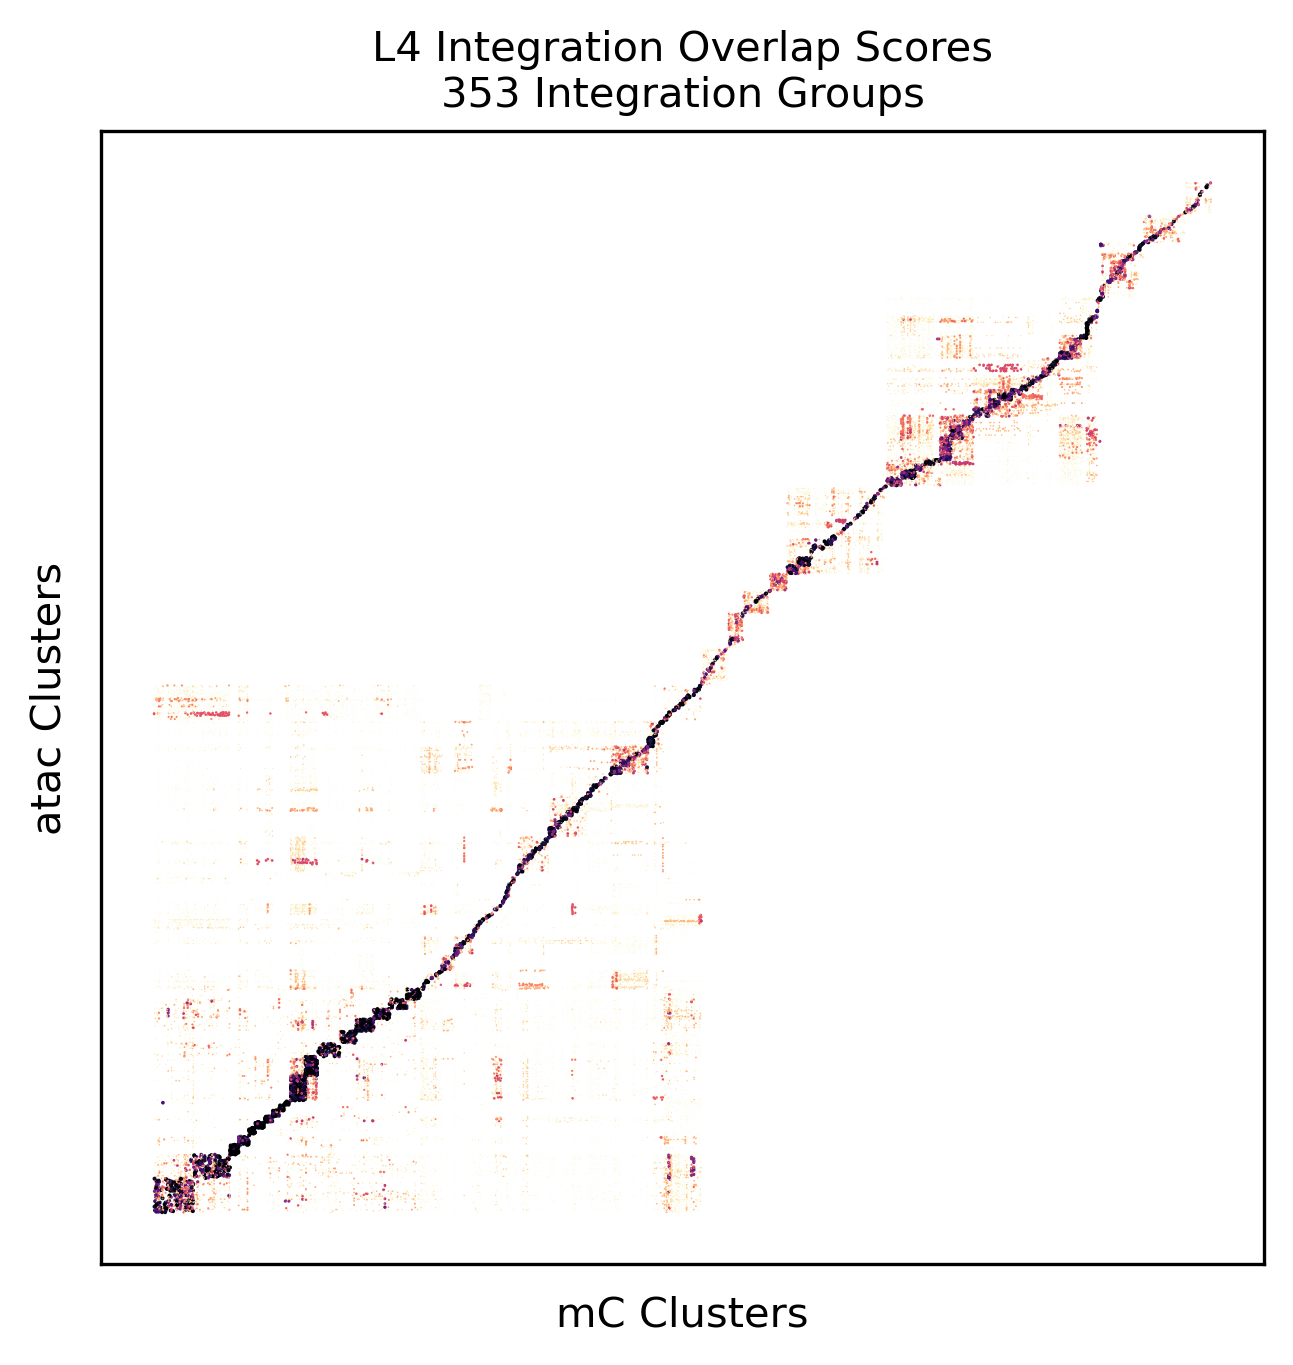

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
sns.scatterplot(data=plot_data.sample(100000),
                x='x',
                y='y',
                linewidth=0,
                size='OS',
                size_norm=(0, 1),
                sizes=(0, 1),
                hue='OS',
                hue_norm=(0, 1),
                palette=palette,
                cmap=cmap,
                legend=None)
ax.set(xticks=[],
       xlabel='mC Clusters',
       yticks=[],
       ylabel='atac Clusters')

ax.set_title(f'L4 Integration Overlap Scores\n'
             f'{atac_l4_to_inte_l4.unique().size} Integration Groups',
             fontsize=10)
pass

fig.savefig('L4_confusion_matrix.png')